# Jorge Mariles Estrada A01335663

<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. <br>
Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()<br>
Limpia los datos eliminando los registros nulos o rellena con la media de la columna<br>
Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión<br>
Realiza el conteo de las variables categóricas<br>
Escala los datos, si consideras necesario<br>
Reduce las dimensiones con PCA, si consideras necesario.<br>
    <ul> Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%<br>
     Indica la importancia de las variables en cada componente</ul> <br>
Elabora los histogramas de los atributos para visualizar su distribución<br>
Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.<br>
Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.<br>

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df=df.dropna(subset=['Y'])
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
print(df.shape)
print('--------------------------')
print(df.columns)
print('--------------------------')
print(df.dtypes)
print('--------------------------')
print(df.info)
print('--------------------------')
print(df.isna)

(29997, 25)
--------------------------
Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')
--------------------------
ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object
--------------------------
<bound method DataFrame.info of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0 

In [4]:


categorical_features=['X2','X3','X4']+  [F'X{l}' for l in range (6,12) ]
numeric_features=['X1','X5'] +[F'X{l}' for l in range (12,18) ] +[F'X{l}' for l in range (18,24) ]



numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
)

#categorical_transformer = OneHotEncoder(handle_unknown="ignore")
categorical_transformer = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent"))]
)





preprocessor1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ('np_array_transform', 'passthrough', ['Y'])
    ],
    remainder='drop',
    
)


df_imputed=pd.DataFrame(preprocessor1.fit_transform(df),columns=numeric_features+categorical_features+['Y'] )
df_imputed.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [5]:
for x in df_imputed.columns:
    print(f'nans in {x}:',df_imputed.loc[df_imputed[x].isna()].shape[0])

nans in X1: 0
nans in X5: 0
nans in X12: 0
nans in X13: 0
nans in X14: 0
nans in X15: 0
nans in X16: 0
nans in X17: 0
nans in X18: 0
nans in X19: 0
nans in X20: 0
nans in X21: 0
nans in X22: 0
nans in X23: 0
nans in X2: 0
nans in X3: 0
nans in X4: 0
nans in X6: 0
nans in X7: 0
nans in X8: 0
nans in X9: 0
nans in X10: 0
nans in X11: 0
nans in Y: 0


In [6]:
pd.set_option('display.max_columns', None)
df_imputed.describe().loc[ ['mean','std']  , :]

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
mean,167496.072274,35.483615,51228.534837,49182.573924,47016.370470,43265.961896,40314.124779,38876.048538,5662.352002,5921.706137,5225.052405,4826.365170,4799.417042,5216.012201,1.603794,1.853085,1.551955,-0.016768,-0.133813,-0.166517,-0.220822,-0.266293,-0.291096,0.221189
std,129748.803871,9.217366,73637.071379,71175.530729,69351.044047,64334.451680,60797.686272,59555.293718,16562.848369,23041.938698,17607.010539,15666.756595,15278.899254,17778.281538,0.489116,0.790317,0.521963,1.123708,1.197088,1.195840,1.168970,1.132990,1.149861,0.415054


In [7]:
numeric_scaler = Pipeline(
    steps=[("scaler", StandardScaler())]
)


preprocessor2 = ColumnTransformer(
    transformers=[
        ("num_scaler", numeric_scaler, numeric_features),
        ('np_array_transform', 'passthrough', categorical_features+['Y'])
    ],

    
)

df_scaled=pd.DataFrame(preprocessor2.fit_transform(df_imputed),columns=numeric_features+categorical_features+['Y'])
df_scaled.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
0,-1.136801,-1.245888,-0.642561,-0.647432,-0.668024,-0.672527,-0.663098,-0.652783,-0.341876,-0.227099,-0.296765,-0.308069,-0.314126,-0.293397,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
1,-0.366068,-1.028903,-0.659279,-0.666779,-0.639285,-0.621667,-0.606269,-0.598026,-0.341876,-0.213601,-0.239968,-0.244239,-0.314126,-0.180899,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
2,-0.597288,-0.160961,-0.298625,-0.493936,-0.482443,-0.449766,-0.417229,-0.391694,-0.250224,-0.191901,-0.239968,-0.244239,-0.248675,-0.012151,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.905581,0.164517,-0.057561,-0.013342,0.032799,-0.232414,-0.186772,-0.156648,-0.221122,-0.169377,-0.228609,-0.237856,-0.244159,-0.237148,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905581,2.334370,-0.578679,-0.611352,-0.161231,-0.347035,-0.348179,-0.331547,-0.221122,1.334949,0.271200,0.266405,-0.269030,-0.255204,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [8]:
df_scaled[numeric_features].describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04,2.999700e+04
mean,-1.004334e-16,2.539260e-16,-3.789940e-18,2.652958e-17,-4.074186e-17,8.527366e-18,4.263683e-17,-6.063904e-17,1.894970e-17,9.474851e-18,-2.652958e-17,1.752847e-17,-1.350166e-17,1.883127e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213874e+00,-1.571366e+00,-2.944334e+00,-1.671383e+00,-2.945648e+00,-3.315013e+00,-2.000901e+00,-6.355193e+00,-3.418764e-01,-2.570012e-01,-2.967647e-01,-3.080692e-01,-3.141258e-01,-2.933973e-01
25%,-9.055808e-01,-8.119174e-01,-6.472736e-01,-6.490622e-01,-6.394440e-01,-6.362787e-01,-6.340170e-01,-6.316764e-01,-2.814993e-01,-2.207189e-01,-2.746141e-01,-2.890477e-01,-2.975013e-01,-2.867598e-01
50%,-2.119213e-01,-1.609614e-01,-3.916983e-01,-3.930851e-01,-3.882828e-01,-3.763826e-01,-3.652688e-01,-3.659693e-01,-2.150845e-01,-1.698109e-01,-1.945310e-01,-2.123235e-01,-2.159496e-01,-2.090232e-01
75%,5.588116e-01,5.984874e-01,2.154585e-01,2.083676e-01,1.896273e-01,1.748554e-01,1.622766e-01,1.734375e-01,-3.962863e-02,-4.000191e-02,-4.089646e-02,-5.191749e-02,-5.029353e-02,-6.839989e-02
max,6.416381e+00,4.721209e+00,1.240269e+01,1.313322e+01,2.331760e+01,1.318631e+01,1.458726e+01,1.549490e+01,5.240066e+01,7.283959e+01,5.059518e+01,3.933066e+01,2.760255e+01,2.944372e+01


In [9]:
pcs = PCA()
pcs.fit(df_scaled[numeric_features])
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4330,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


Con 9 componentes tenemos mas del 95% de la varianza 

In [10]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_scaled[numeric_features].columns.to_list()
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165472,0.300827,-0.378774,-0.200211,0.034724,-0.078227,0.110938,-0.048128,-0.821872,-0.029135,-0.006160,0.015718,-0.000473,0.003348
X5,0.032726,0.071944,-0.869562,0.338351,-0.038982,0.071348,-0.078637,0.028098,0.330855,-0.009110,0.000078,-0.001334,0.000204,0.001075
X12,0.372424,-0.190855,-0.034303,-0.063977,0.041154,-0.044069,0.008159,0.009438,0.010326,0.566750,0.416055,-0.432899,-0.183244,-0.316891
X13,0.383243,-0.174656,-0.001880,0.007383,0.083061,-0.029007,-0.032345,-0.135670,0.017186,0.386846,0.038308,0.344946,0.328389,0.645855
X14,0.388254,-0.126926,0.034702,0.060461,0.114156,0.098803,-0.121318,0.092864,-0.018746,0.122834,-0.484776,0.495782,-0.085299,-0.527855
X15,0.391549,-0.120429,0.034006,0.074801,0.028584,0.014393,0.126417,0.039196,0.018917,-0.205260,-0.523115,-0.489480,-0.363128,0.345401
X16,0.388495,-0.105961,0.033835,0.039653,-0.106927,-0.099036,-0.007575,0.049706,0.023425,-0.420029,0.068215,-0.249878,0.718721,-0.225239
X17,0.380659,-0.094248,0.018540,-0.070283,-0.164903,0.069734,0.007982,0.000045,0.058689,-0.488835,0.513424,0.338905,-0.427604,0.071433
X18,0.135181,0.383262,0.173483,0.361364,0.226143,0.039918,-0.201117,-0.749030,0.021992,-0.056548,0.047637,-0.069314,-0.044759,-0.084664
X19,0.116804,0.408283,0.200819,0.346318,0.150500,0.407289,-0.279627,0.577988,-0.111690,0.050837,0.147271,-0.068855,0.038684,0.124965


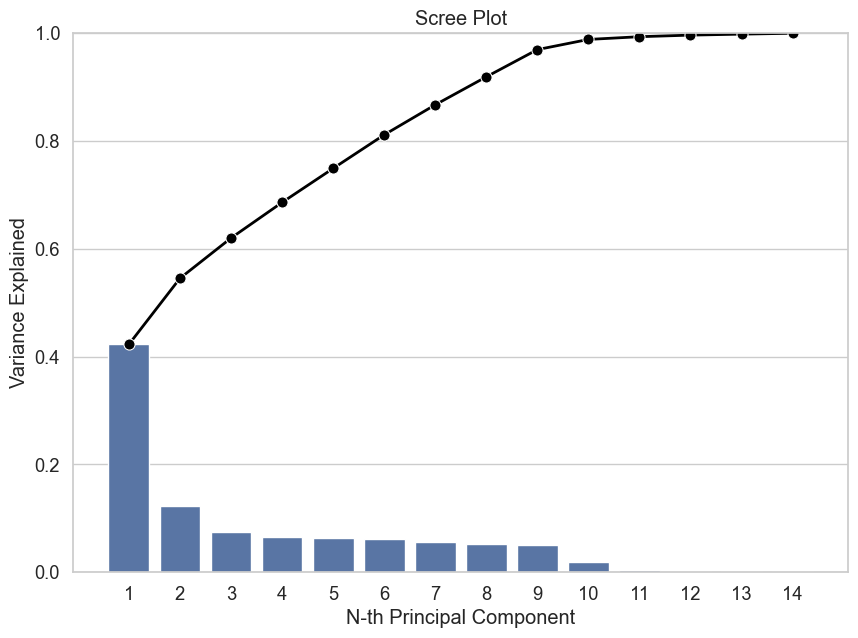

In [20]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [23]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3
0,2.4330,0.4228,0.4228
1,1.3100,0.1226,0.5454
2,1.0223,0.0747,0.6200
3,0.9617,0.0661,0.6861
4,0.9400,0.0631,0.7492
5,0.9342,0.0623,0.8115
6,0.8829,0.0557,0.8672
7,0.8524,0.0519,0.9191
8,0.8410,0.0505,0.9696


# Df de componentes

In [22]:
pca_final = PCA(n_components=9)
pca_final.fit(df_scaled[numeric_features])
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca_final.explained_variance_),
                             'Proportion of variance': pca_final.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pca_final.explained_variance_ratio_)
                             })
pca_transoformed=pca_final.transform(df_scaled[numeric_features])
df_pca=pd.DataFrame(pca_transoformed,columns=[f'PC{x}' for x in range(0,pca_transoformed.shape[1])])
df_pca.head()


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.958595,-0.536573,1.330058,-0.175623,0.017632,0.002331,0.012868,0.058422,0.220219
1,-1.735419,-0.217001,0.863644,-0.280347,0.048689,-0.118151,0.098946,0.074539,-0.287992
2,-1.224352,-0.284752,0.213101,-0.008042,0.126922,-0.062770,-0.013924,0.084619,0.282237
3,-0.541060,-0.666541,0.097562,0.292321,0.009755,0.108722,-0.134048,0.064326,0.598252
4,-0.848833,0.738576,-1.392716,1.658897,-0.317728,0.586245,-0.542712,1.114948,1.233791


In [14]:
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2
Standard deviation,2.432970,1.310025,1.022345
Proportion of variance,0.422796,0.122579,0.074654
Cumulative proportion,0.422796,0.545375,0.620029


In [24]:

df_final= pd.concat([ df_pca, df_imputed[df_imputed.columns.difference(numeric_features)]],axis=1 )
df_final

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,X10,X11,X2,X3,X4,X6,X7,X8,X9,Y
0,-1.958595,-0.536573,1.330058,-0.175623,0.017632,0.002331,0.012868,0.058422,0.220219,-2.0,-2.0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,1.0
1,-1.735419,-0.217001,0.863644,-0.280347,0.048689,-0.118151,0.098946,0.074539,-0.287992,0.0,2.0,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,1.0
2,-1.224352,-0.284752,0.213101,-0.008042,0.126922,-0.062770,-0.013924,0.084619,0.282237,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,-0.541060,-0.666541,0.097562,0.292321,0.009755,0.108722,-0.134048,0.064326,0.598252,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.848833,0.738576,-1.392716,1.658897,-0.317728,0.586245,-0.542712,1.114948,1.233791,0.0,0.0,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,2.576723,-0.689471,-0.305748,0.517276,0.649683,0.501612,-0.399992,0.140813,-0.358063,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
29993,-1.544107,0.187159,-0.724966,0.546647,-0.114623,0.065820,0.315087,0.107849,0.149401,0.0,0.0,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,0.0
29994,-1.284946,0.146794,0.250632,0.430330,-0.481118,-0.179620,0.819819,0.226495,0.964590,0.0,0.0,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,1.0
29995,0.831717,2.421542,0.364933,0.216492,0.539814,2.464252,-1.165955,-4.263657,1.549694,0.0,-1.0,1.0,3.0,1.0,1.0,-1.0,0.0,0.0,1.0


# Visualizaciones 

### Visualizar la distribucion de la variable de salida para preevenir variables no niveladas 

<AxesSubplot:title={'center':'y'}, xlabel='Y'>

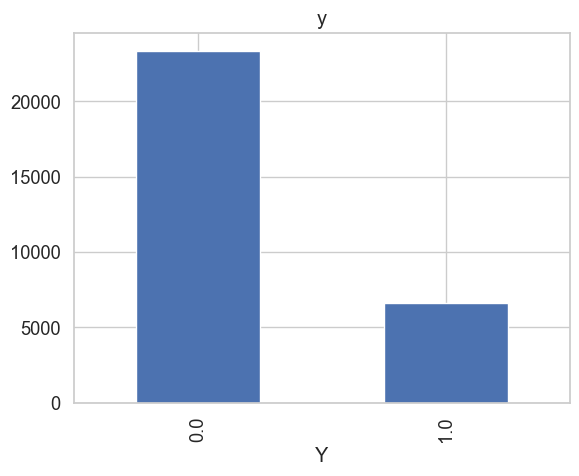

In [25]:
values_y=df_final.pivot_table(columns=['Y'], aggfunc='size')
values_y.plot(kind="bar",title='y')

### visualizar distribucion de variables categoricas para ver distribuciones y  valores no deseados 

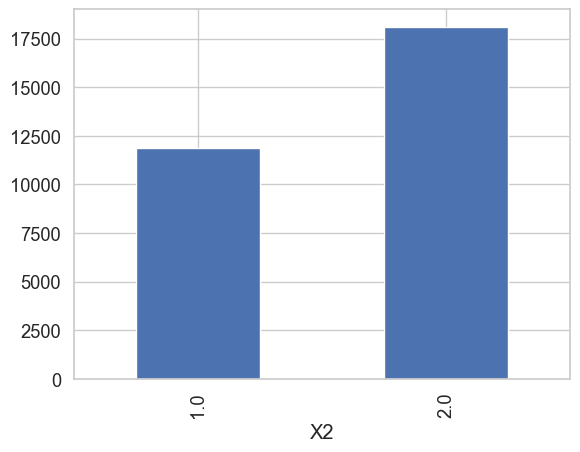

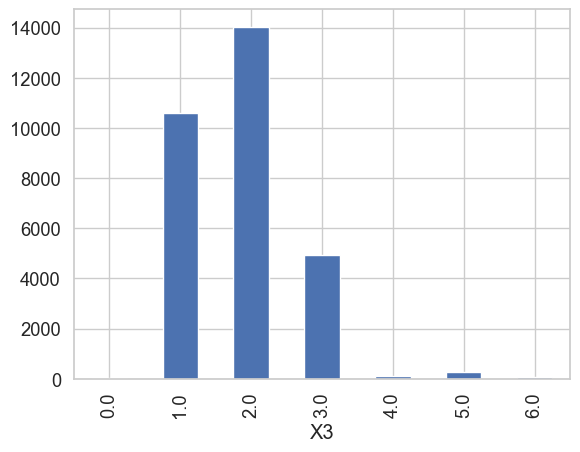

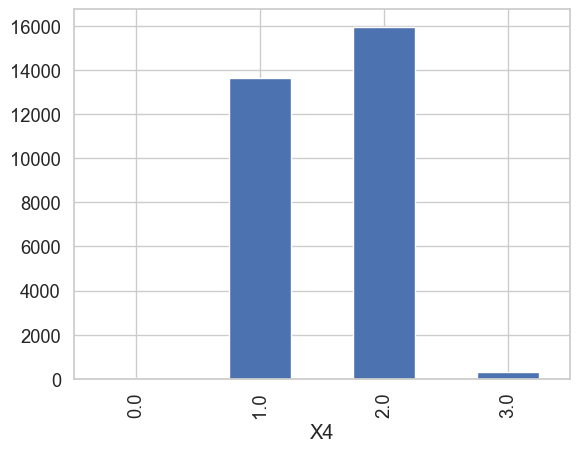

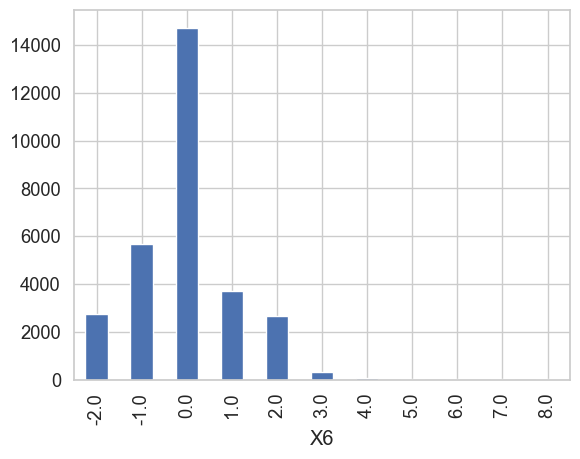

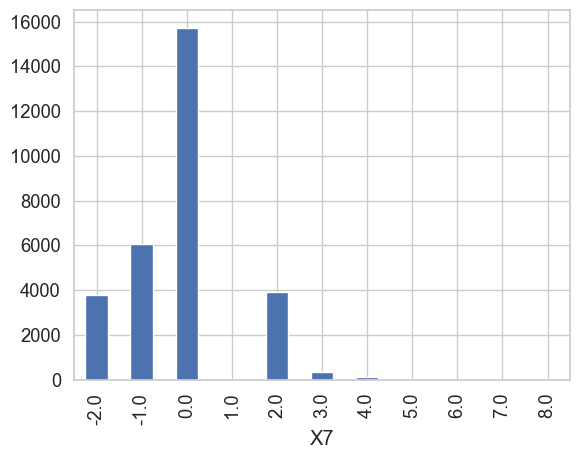

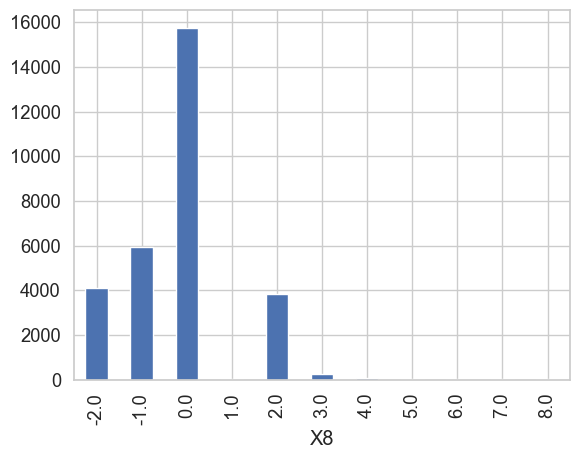

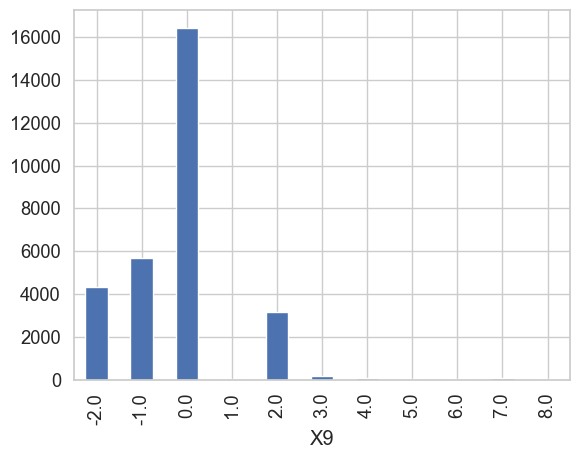

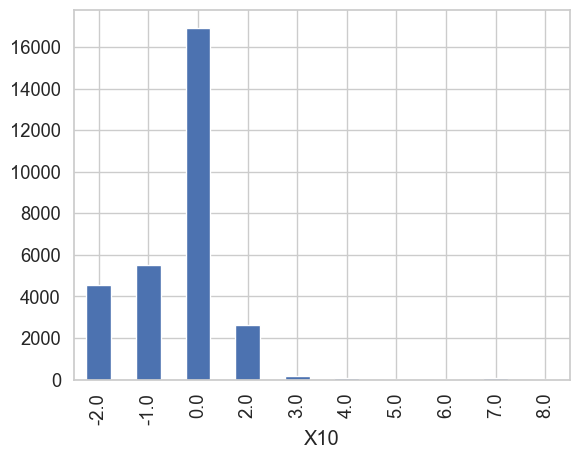

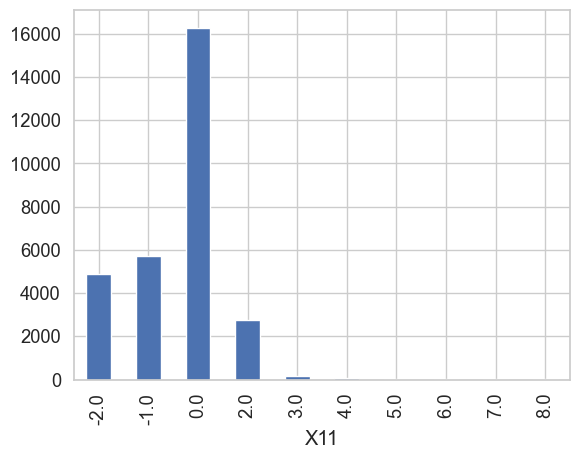

In [29]:

for x in categorical_features:
    values=df_final.pivot_table(columns=[x], aggfunc='size')
    values.plot(kind="bar")
    plt.show()

## numericas 

### como las variables numeircas fueron reducidas con PCA la grafica que nos sirve mas es la que explica la varianza y varianza acumulada ya descrita anteriormente

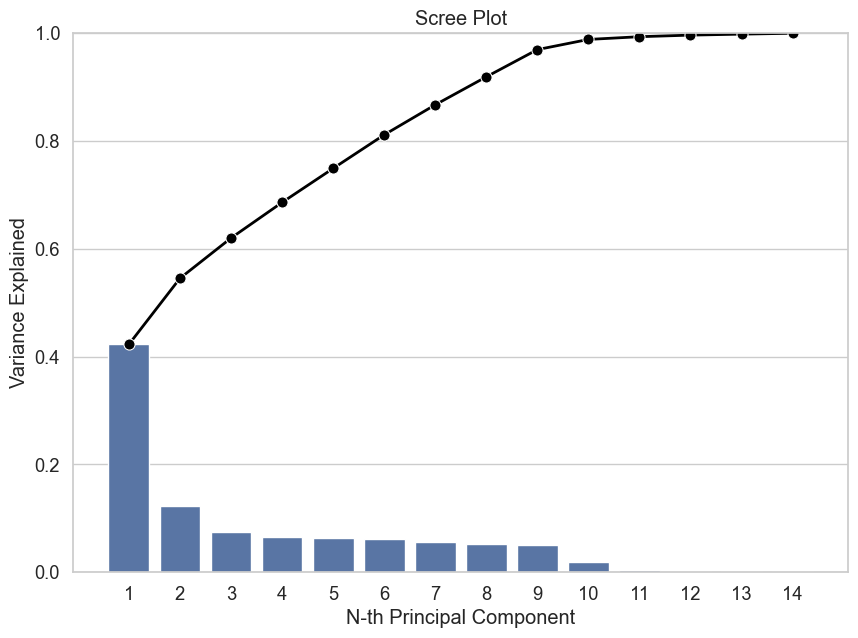

In [35]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()